<a href="https://colab.research.google.com/github/krit0885824924/Project-BeeAi/blob/main/ProjectBee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tqdm import tqdm

In [ ]:
!dir

In [ ]:
df = pd.read_csv('pollen_data.csv')
df

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0
...,...,...,...
709,709,NP64239-233r.jpg,0
710,710,NP10304-132r.jpg,0
711,711,NP28671-238r.jpg,0
712,712,P14163-218r.jpg,1


In [ ]:
df['pollen_carrying'].value_counts()

1    369
0    345
Name: pollen_carrying, dtype: int64

In [ ]:
import random 

In [ ]:
random.seed(69420)

In [ ]:
df['subset'] = random.choices([0,1,2],[0.8,0.1,0.1],k = len(df))
df

,Unnamed: 0,filename,pollen_carrying,subset
0,0,P10057-125r.jpg,1,0
1,1,P57380-120r.jpg,1,0
2,2,NP63671-221r.jpg,0,0
3,3,NP53776-47r.jpg,0,1
4,4,NP13382-201r.jpg,0,0
...,...,...,...,...
709,709,NP64239-233r.jpg,0,0
710,710,NP10304-132r.jpg,0,0
711,711,NP28671-238r.jpg,0,0
712,712,P14163-218r.jpg,1,2


In [ ]:
x = []
y = []
for i,a in tqdm(df.iterrows()):
    x.append(cv2.resize(cv2.imread('images/'+a.filename),(64,64))/255)
df['x'] = x

714it [00:00, 794.96it/s]


In [ ]:
df

In [ ]:
def gene(df,batch):
    while 1:
        x = []
        y = []
        sub = df.groupby('pollen_carrying').sample(int(batch/2))
        for i,a in sub.iterrows():
            x.append(a.x)
            y.append(a.pollen_carrying)
        yield np.array(x),np.array(y) 

In [ ]:
x,y = next(gene(df,18))

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(64,64,3))
x = tf.keras.layers.Conv2D(32,(3,3),padding="same")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=x)
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
test = model.fit(gene(df[df.subset == 0],90),epochs=20
                ,validation_data=(gene(df[df.subset == 1],45))
                ,steps_per_epoch=10
                ,validation_steps=10)

Epoch 1/20
10/10 [==============================] - 4s 359ms/step - loss: 0.9266 - accuracy: 0.5700 - val_loss: 0.6912 - val_accuracy: 0.6932
Epoch 2/20
10/10 [==============================] - 3s 339ms/step - loss: 0.6653 - accuracy: 0.6822 - val_loss: 0.6894 - val_accuracy: 0.6159
Epoch 3/20
10/10 [==============================] - 4s 402ms/step - loss: 0.5516 - accuracy: 0.7533 - val_loss: 0.6749 - val_accuracy: 0.6250
Epoch 4/20
10/10 [==============================] - 4s 381ms/step - loss: 0.5033 - accuracy: 0.7656 - val_loss: 0.6717 - val_accuracy: 0.7477
Epoch 5/20
10/10 [==============================] - 3s 336ms/step - loss: 0.4551 - accuracy: 0.8078 - val_loss: 0.6648 - val_accuracy: 0.7182
Epoch 6/20
10/10 [==============================] - 3s 340ms/step - loss: 0.4056 - accuracy: 0.8467 - val_loss: 0.6563 - val_accuracy: 0.8295
Epoch 7/20
10/10 [==============================] - 4s 358ms/step - loss: 0.3778 - accuracy: 0.8633 - val_loss: 0.6494 - val_accuracy: 0.8068
Epoch 

In [ ]:
model.evaluate(gene(df[df.subset == 2],50),steps=100)

100/100 [==============================] - 3s 29ms/step - loss: 0.4908 - accuracy: 0.9260


[0.49075984954833984, 0.9259999990463257]

In [ ]:
test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

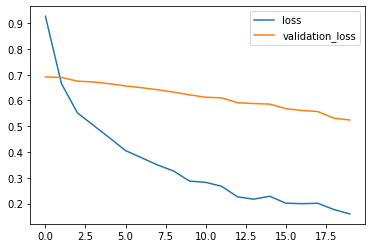

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test.history['loss'],label='loss')
plt.plot(test.history['val_loss'],label='validation_loss')
plt.legend()

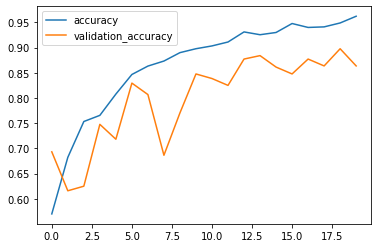

In [ ]:
plt.plot(test.history['accuracy'],label='accuracy')
plt.plot(test.history['val_accuracy'],label='validation_accuracy')
plt.legend()

In [ ]:
model.save('bee.h5')

In [ ]:
print(np.shape(df.iloc[0]['x']))

In [42]:
def test_image(n):
  img = df.iloc[n]['x']
  img = np.array(img+img)
  return model.predict(img)[0]

In [55]:
def test_image(n):   
  img = df.iloc[n]['x']
  plt.imshow(df.iloc[n]['x'])
  plt.imshow(df.iloc[n]['x'][:, :, ::-1])
  img = np.array([img for i in range(2)])   
  return model.predict(img)[0]

array([0.17118672], dtype=float32)

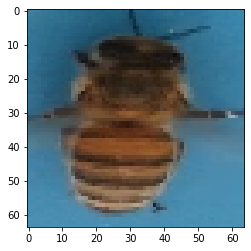

In [58]:
test_image(100)